In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

In [2]:
filepath = os.getcwd() + "/Downloads"+ "/Mall_Customers.csv"
df = pd.read_csv(filepath)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Univariate Analysis

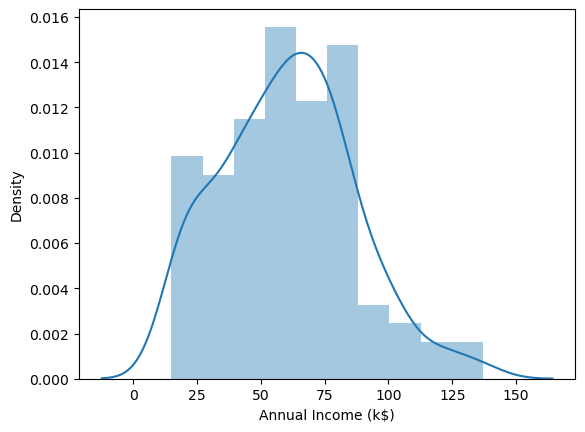

In [6]:
sns.distplot(df['Annual Income (k$)']);

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

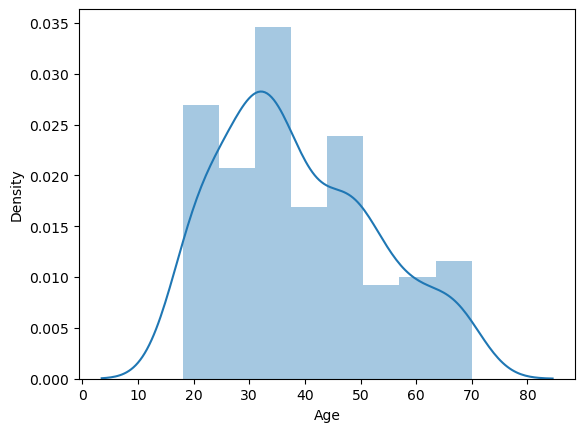

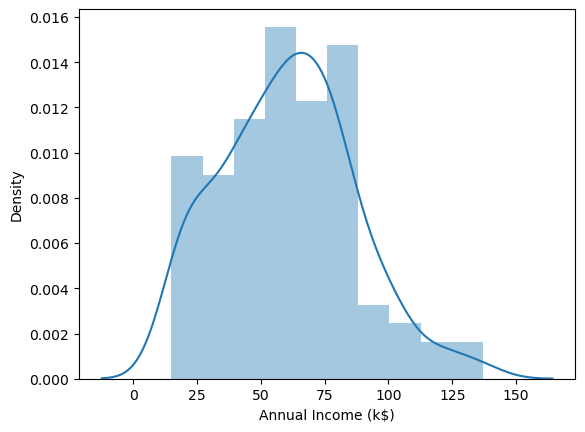

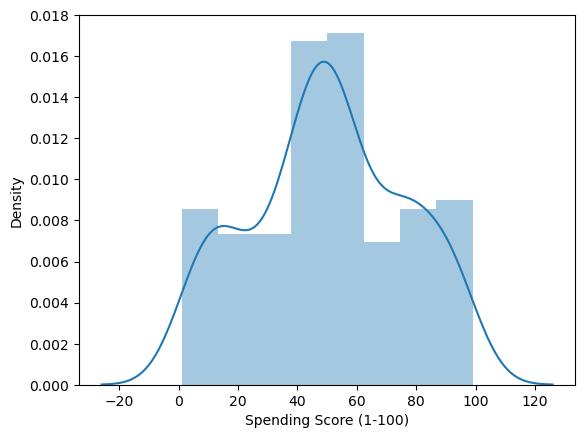

In [8]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

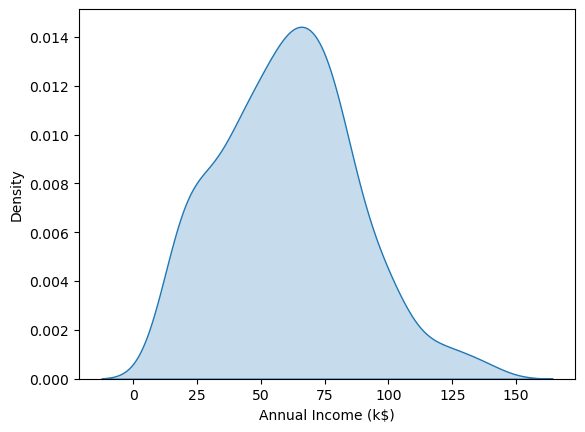

In [9]:
sns.kdeplot(df['Annual Income (k$)'], shade= True);

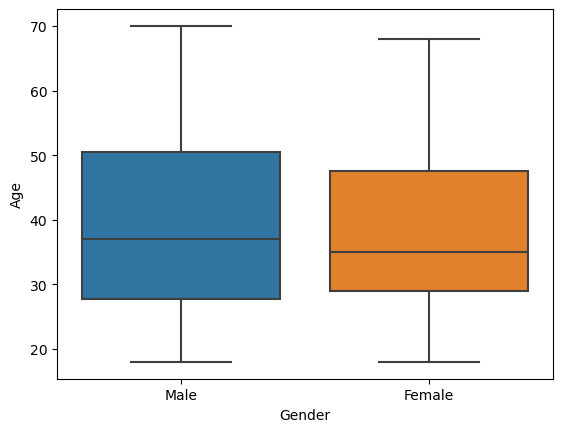

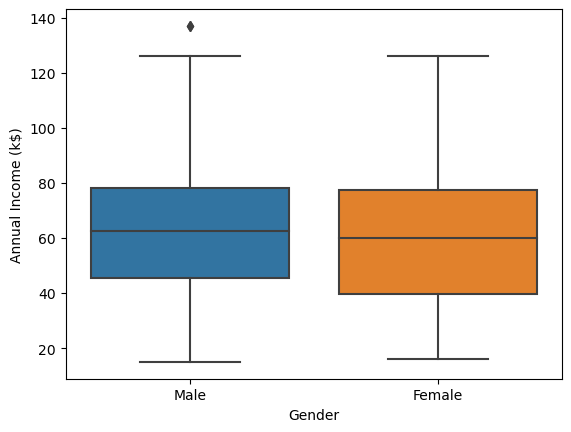

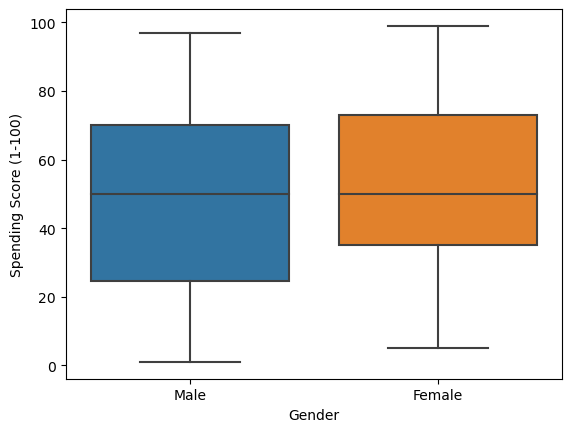

In [10]:
columns = ['Age', 'Annual Income (k$)',
       'Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.boxplot(df,x=df['Gender'],y=df[i]);
    



In [11]:
df['Gender'].value_counts(normalize=True)

Female    0.56
Male      0.44
Name: Gender, dtype: float64

# Bivariate Analysis

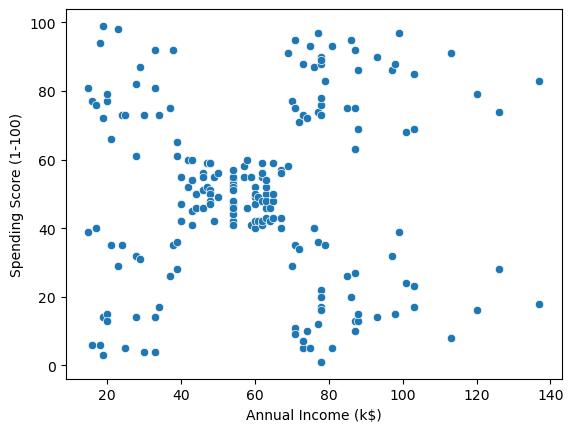

In [12]:
sns.scatterplot(data=df,x='Annual Income (k$)',
       y='Spending Score (1-100)');

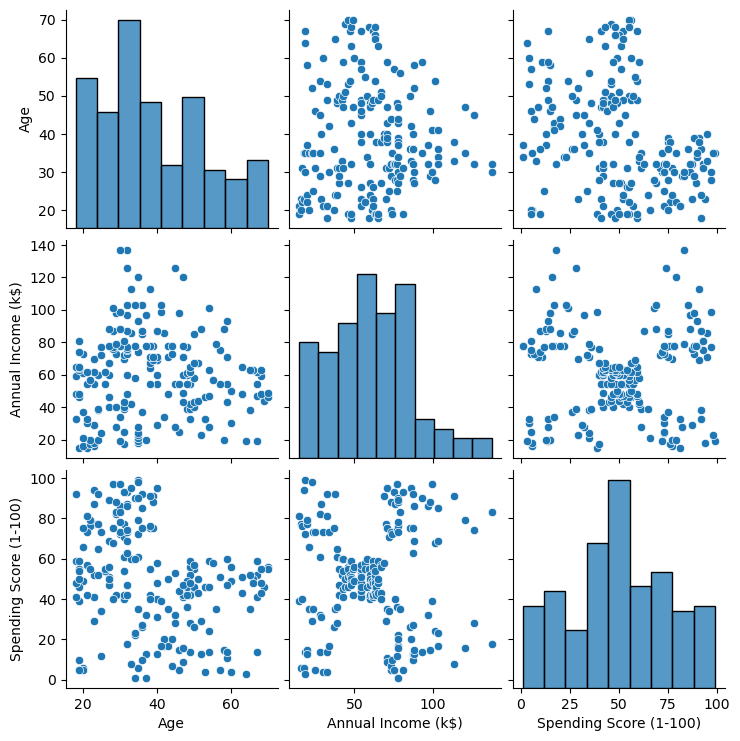

In [13]:
df=df.drop('CustomerID',axis= 1)
sns.pairplot(df)

In [14]:
df.groupby(['Gender'])['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [15]:
df.corr()

,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


<Axes: >

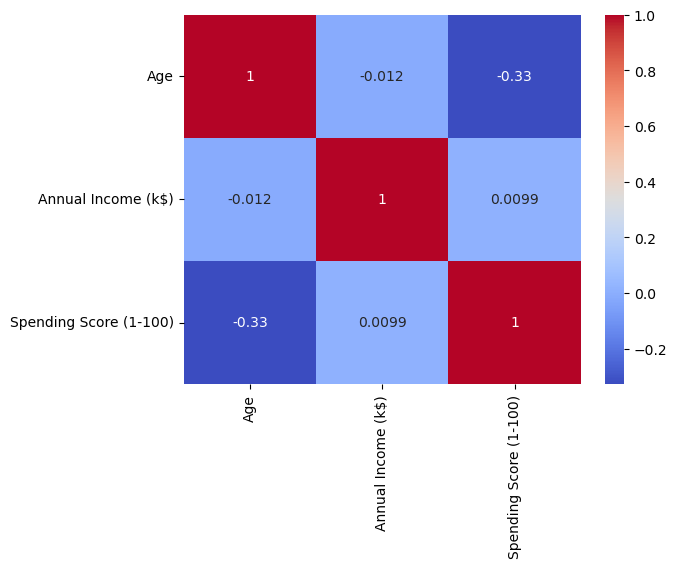

In [16]:
sns.heatmap(df.corr(),annot= True,cmap='coolwarm' )

# Clustering - Univariate, Bivariate, Multivariate

In [57]:
clustering1 = KMeans(n_clusters=3)

In [58]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [59]:
clustering1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int32)

In [60]:
df['income Cluster'] = clustering1.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,0
1,Male,21,15,81,1,4
2,Female,20,16,6,1,0
3,Female,23,16,77,1,4
4,Female,31,17,40,1,0


In [61]:
df['income Cluster'].value_counts()

0    90
1    74
2    36
Name: income Cluster, dtype: int64

In [62]:
clustering1.inertia_ #Getting the Centriod

23517.330930930933

# We want to get the appropraite number of cluster

In [63]:
intertia_scores = []
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [64]:
intertia_scores

[137277.28000000003,
 48660.88888888889,
 23517.330930930933,
 13278.112713472485,
 8481.496190476191,
 5050.9047619047615,
 3949.2756132756135,
 2831.2960317460324,
 2387.4397435897436,
 1734.1677489177487]

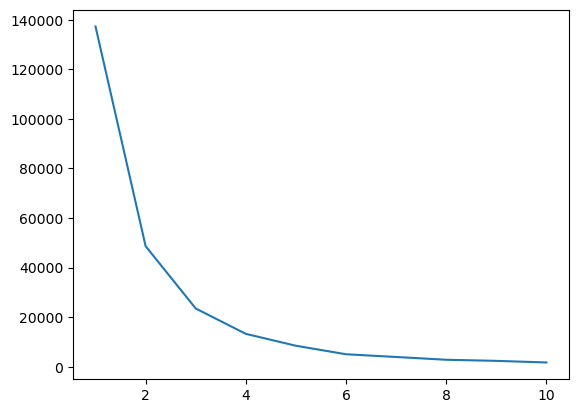

In [65]:
plt.plot(range(1,11),intertia_scores)

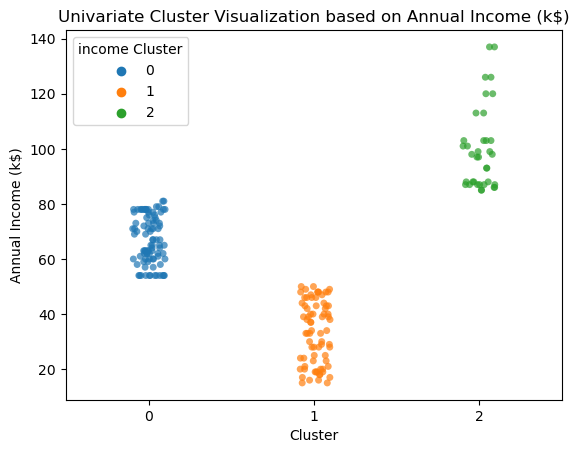

In [66]:
import seaborn as sns

# Sample data with "income" column and corresponding cluster labels (replace with your own data)
data = df['Annual Income (k$)']
cluster_labels = df['income Cluster']

# Create a scatter plot with jitter
sns.stripplot(x=cluster_labels, y=data, jitter=True, alpha=0.7, hue=df['income Cluster'],palette='tab10')
plt.xlabel('Cluster')
plt.ylabel('Annual Income (k$)')
plt.title('Univariate Cluster Visualization based on Annual Income (k$)')
plt.show()


In [26]:
df.groupby('income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
income Cluster,,,
0,38.722222,67.088889,50.000000
1,39.500000,33.486486,50.229730
2,37.833333,99.888889,50.638889


In [28]:
center1 = pd.DataFrame(clustering1.cluster_centers_)
center1

,0
0,67.088889
1,33.486486
2,99.888889


# Bivariate Clustering


In [67]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)',
       'Spending Score (1-100)']])
df['Spending and Income Cluster']= clustering2.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),income Cluster,Spending and Income Cluster
0,Male,19,15,39,1,1
1,Male,21,15,81,1,2
2,Female,20,16,6,1,1
3,Female,23,16,77,1,2
4,Female,31,17,40,1,1


In [34]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)',
       'Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)

In [35]:
intertia_scores2

[269981.28,
 183653.32894736843,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37233.814510710006,
 30566.45113025186,
 25018.576334776335,
 21850.16528258563,
 19755.6198608334]

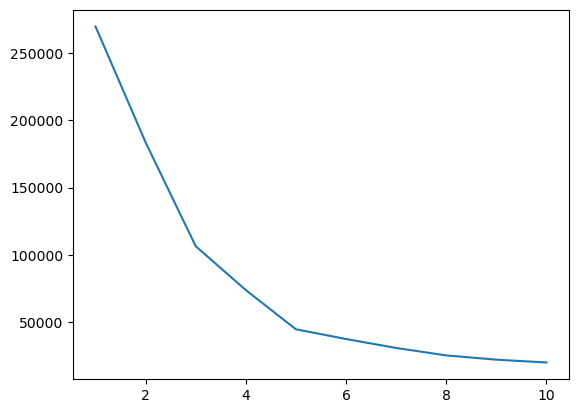

In [36]:
plt.plot(range(1,11),intertia_scores2);

In [37]:
centers = pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']
centers

,x,y
0,26.304348,20.913043
1,55.296296,49.518519
2,86.538462,82.128205
3,88.200000,17.114286
4,25.727273,79.363636


### Visualization of the two Cluster (Spending score, Annual Income) and the Centriod


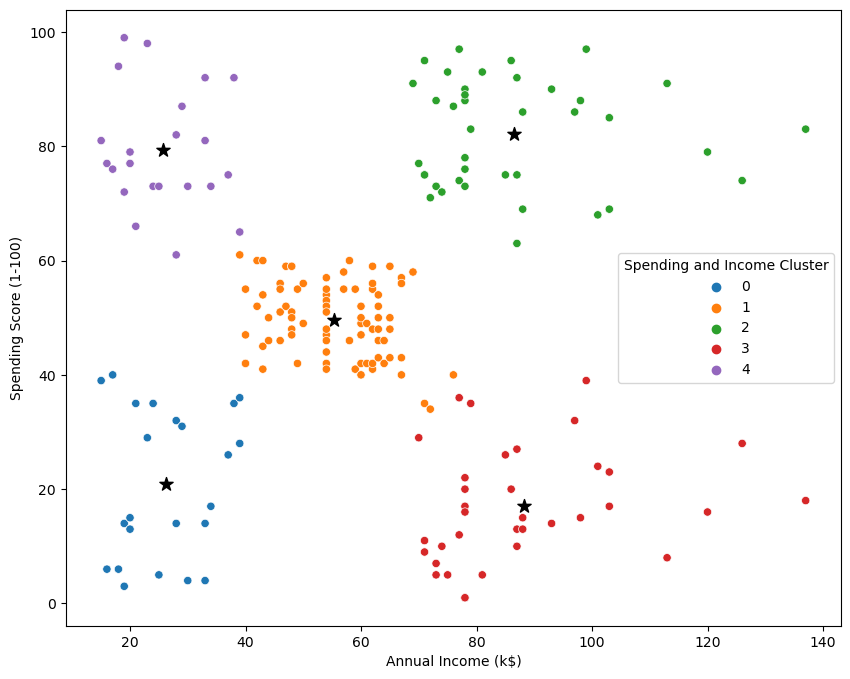

In [38]:
plt.figure(figsize=(10,8))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df,x='Annual Income (k$)',
       y='Spending Score (1-100)',hue='Spending and Income Cluster', palette='tab10' );

### Analysis of the income Cluster by Gender

In [68]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize = 'index')

Gender,Female,Male
Spending and Income Cluster,,
0,0.538462,0.461538
1,0.608696,0.391304
2,0.590909,0.409091
3,0.457143,0.542857
4,0.592593,0.407407


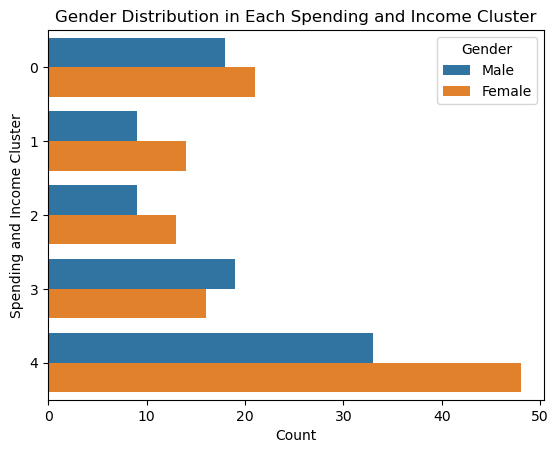

In [81]:
data = df

# Create a vertical bar plot
sns.countplot(y='Spending and Income Cluster', data=df, hue='Gender',palette='tab10')
plt.xlabel('Count')
plt.ylabel('Spending and Income Cluster')
plt.title('Gender Distribution in Each Spending and Income Cluster')
plt.show()

### Analysis of the income Cluster by Average age


In [69]:
df.groupby('Spending and Income Cluster')['Age', 'Annual Income (k$)',
       'Spending Score (1-100)'].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Spending and Income Cluster,,,
0,32.692308,86.538462,82.128205
1,45.217391,26.304348,20.913043
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,42.716049,55.296296,49.518519


In [ ]:
#multivariate clustering
from sklearn.preprocessing import StandardScaler

In [ ]:
scale = StandardScaler()

In [ ]:
df.head()

In [ ]:
# turn gender to numrical value
dff = pd.get_dummies(df,drop_first=True)
dff.head()

In [ ]:
dff.columns

In [ ]:
dff = dff[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']]
dff.head()

In [ ]:
dff = pd.DataFrame(scale.fit_transform(dff))

In [ ]:
dff

In [ ]:
intertia_scores3=[]
for i in range(1,11):
    kmeans3=KMeans(n_clusters=i)
    kmeans3.fit(dff)
    intertia_scores3.append(kmeans3.inertia_)
plt.plot(range(1,11),intertia_scores3)